In [1]:
import csv
import statistics
import pandas as pd
import pickle
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os, pickle
from datetime import datetime
import sqlite3

In [3]:
out_special = []
with open('pay_with_special.csv', newline='') as f:
    csv_reader = csv.reader(f, delimiter=',')
    for i in csv_reader:
        out_special.append(i)

ids_special = [item[0] for item in out_special]
rates_special = [item[1] for item in out_special]

rates_special = [float(item) for item in rates_special]

In [4]:
out_special

[['01001', '23.78'],
 ['01003', '30.43'],
 ['01005', '24.96'],
 ['01007', '26.03'],
 ['01009', '26.03'],
 ['01011', '23.78'],
 ['01013', '23.78'],
 ['01015', '24.54'],
 ['01017', '24.01'],
 ['01019', '24.54'],
 ['01021', '26.03'],
 ['01023', '26.83'],
 ['01025', '30.43'],
 ['01027', '24.54'],
 ['01029', '24.54'],
 ['01031', '24.96'],
 ['01033', '26.1'],
 ['01035', '30.43'],
 ['01037', '23.78'],
 ['01039', '30.43'],
 ['01041', '23.78'],
 ['01043', '26.03'],
 ['01045', '24.96'],
 ['01047', '23.78'],
 ['01049', '24.54'],
 ['01051', '23.78'],
 ['01053', '30.43'],
 ['01055', '24.54'],
 ['01057', '26.03'],
 ['01059', '26.1'],
 ['01061', '24.96'],
 ['01063', '26.03'],
 ['01065', '26.03'],
 ['01067', '24.96'],
 ['01069', '24.96'],
 ['01071', '26.1'],
 ['01073', '26.03'],
 ['01075', '26.03'],
 ['01077', '26.1'],
 ['01079', '26.16'],
 ['01081', '23.78'],
 ['01083', '26.16'],
 ['01085', '23.78'],
 ['01087', '23.78'],
 ['01089', '26.16'],
 ['01091', '26.03'],
 ['01093', '26.1'],
 ['01095', '26.16'

In [5]:
out = []
with open('2016.2.csv', newline='') as f:
    csv_reader = csv.reader(f, delimiter=',')
    for i in csv_reader:
        if len(i[0]) == 4:
            i[0] = '0' + i[0]
        out.append(i)

ids = [item[0] for item in out]
rates = [item[1] for item in out]

ids = ids[1:]
rates = rates[1:]
rates = [float(item) for item in rates]

In [5]:
pay = pd.DataFrame({'rate' : rates_special}, index = ids_special)

In [8]:
start = 22
liste = []
for i in range(8):
    liste.append(start)
    start += 1.5

liste

[22, 23.5, 25.0, 26.5, 28.0, 29.5, 31.0, 32.5]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195E92C4470>]],
      dtype=object)

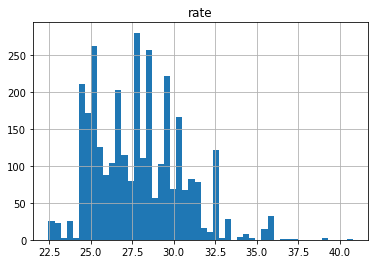

In [6]:
pay.hist(bins=50)

In [7]:
pay.describe()

,rate
count,3171.000000
mean,27.883119
std,2.647974
min,22.440000
25%,25.650000
50%,27.740000
75%,29.610000
max,40.800000


In [6]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3144 entries, 01001 to 02158
Data columns (total 1 columns):
rate    3144 non-null float64
dtypes: float64(1)
memory usage: 49.1+ KB


In [30]:
for i in sets:
    test = pay[(pay['rate'] >= 30)]
    print(i[0],test.count())

rate    612
dtype: int64

In [2]:
conn = sqlite3.connect('wages.db')
cur = conn.cursor()
wg18 = cur.execute('select state, county, date, wg10 from counties where date like "%2018%"').fetchall()
wg17 = cur.execute('select state, county, date, wg10 from counties where date like "%2017%"').fetchall()

In [3]:
date1 = datetime.strptime(wg18[0][2], '%d%b%Y' )
date2 = datetime.strptime(wg18[50][2], '%d%b%Y' )
print(date1 < date2)
print(date1)
print(date2)

True
2018-03-28 00:00:00
2018-06-19 00:00:00


In [4]:
list18 = []
for i in wg18:
    state = i[0]
    county = i[1].split(",")[3]
    date = datetime.strptime(i[2], '%d%b%Y' )
    pay = i[3]
    list18.append([state, county, date, pay])
    
len(list18)

1934

In [5]:
list17 = []
for i in wg17:
    state = i[0]
    county = i[1].split(",")[3]
    date = datetime.strptime(i[2], '%d%b%Y' )
    pay = i[3]
    list17.append([state, county, date, pay])
list17

[['AK', 'Ancorage', datetime.datetime(2017, 9, 12, 0, 0), 36.72],
 ['AK', 'Excludes Ancorage', datetime.datetime(2017, 9, 12, 0, 0), 36.72],
 ['AK', 'Excludes Fairbanks', datetime.datetime(2017, 9, 12, 0, 0), 36.72],
 ['AK', 'Excludes Juneau', datetime.datetime(2017, 9, 12, 0, 0), 36.72],
 ['AK', 'Fairbanks', datetime.datetime(2017, 9, 12, 0, 0), 36.72],
 ['AK', 'Juneau', datetime.datetime(2017, 9, 12, 0, 0), 36.72],
 ['AL', 'Autauga County', datetime.datetime(2017, 12, 29, 0, 0), 24.28],
 ['AL', 'Baldwin County', datetime.datetime(2017, 12, 29, 0, 0), 31.07],
 ['AL', 'Barbour County', datetime.datetime(2017, 12, 29, 0, 0), 25.49],
 ['AL', 'Bibb County', datetime.datetime(2017, 3, 28, 0, 0), 26.66],
 ['AL', 'Blount County', datetime.datetime(2017, 3, 28, 0, 0), 26.66],
 ['AL', 'Bullock County', datetime.datetime(2017, 12, 29, 0, 0), 24.28],
 ['AL', 'Butler County', datetime.datetime(2017, 12, 29, 0, 0), 24.28],
 ['AL', 'Calhoun County', datetime.datetime(2017, 6, 20, 0, 0), 25.13],
 ['

In [ ]:

for i in list17:
    found = [False, i]
    state_county = i[0] + ' ' + i[1]
    date17 = i[2]
    for j in list18:
        state_county2 = j[0] + ' ' + j[1]
        date18 = j[2]
        if state_county == state_county2:
            
            found = True
        
    